#Projeto de Ciência de Dados

### Importando bibliotecas e verificando as versões


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
import sklearn
import plotly

In [4]:
print(f'''Verificando as versões das bibliotecas:\n
pandas:{pd.__version__}
sklearn:{sklearn.__version__}
plotly:{plotly.__version__}
''')

Verificando as versões das bibliotecas:

pandas:1.5.3
sklearn:1.2.2
plotly:5.13.0



# Coleta de dados

In [51]:
# Dados mesclados e tratados

op_saude = pd.read_csv('tratativa\merged_operadora_saude.csv', sep= ',', encoding= 'latin-1')

# Manipulação e visualização de dados

### Tipos de gráficos para a visualização dos dados

#### Histogramas

<Axes: title={'center': 'Peso dos clientes'}, xlabel='peso', ylabel='Count'>

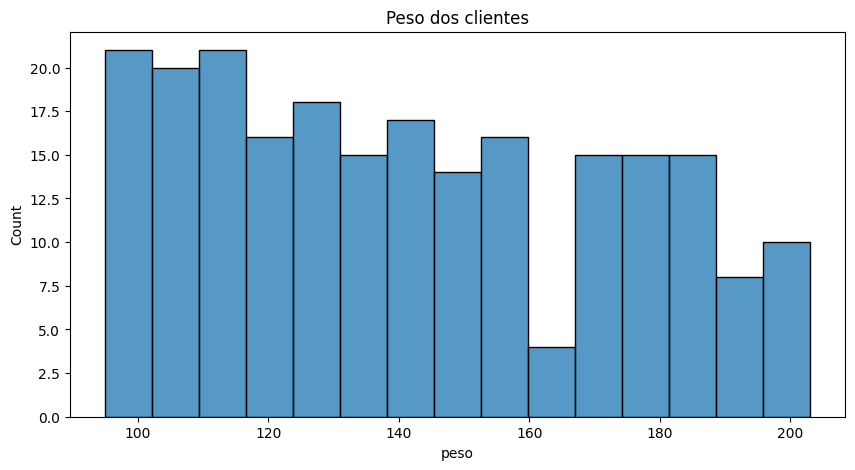

In [52]:
# Criando histograma com base no peso dos clientes
plt.figure(figsize = (10,5))
plt.title('Peso dos clientes')
sns.histplot(op_saude.peso, bins=15)

<Axes: title={'center': 'Colesterol dos clientes'}, xlabel='colesterol', ylabel='Count'>

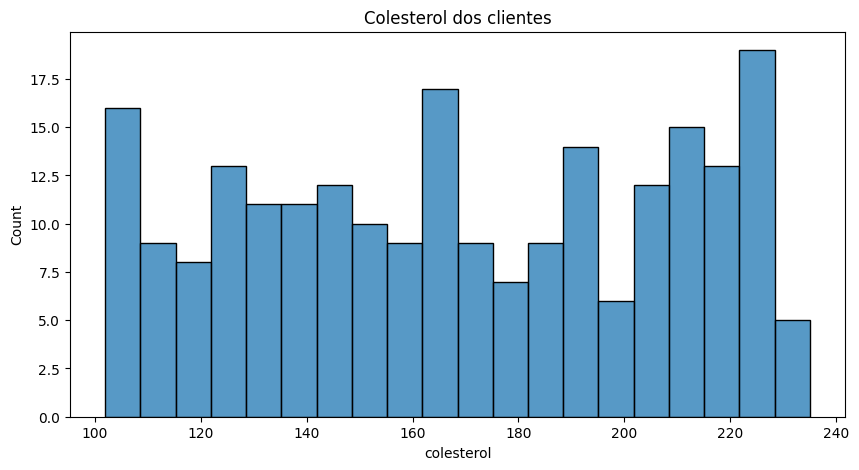

In [53]:
# Criando histograma com base no colesterol dos clientes
plt.figure(figsize=(10,5))
plt.title("Colesterol dos clientes")
sns.histplot(op_saude.colesterol, bins=20)

#### Box Plot

<Axes: title={'center': 'Idade dos clientes'}, xlabel='idade'>

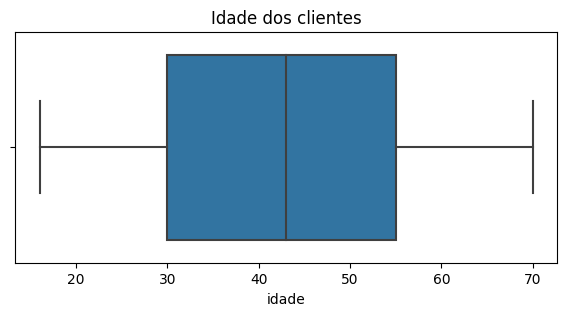

In [60]:
# Criando boxplot baseado na idade dos clientes

plt.figure(figsize=(7,3))
plt.title("Idade dos clientes")
sns.boxplot(x = 'idade', data= op_saude, orient= 'h')

<Axes: title={'center': 'Colesterol dos clientes'}, xlabel='colesterol'>

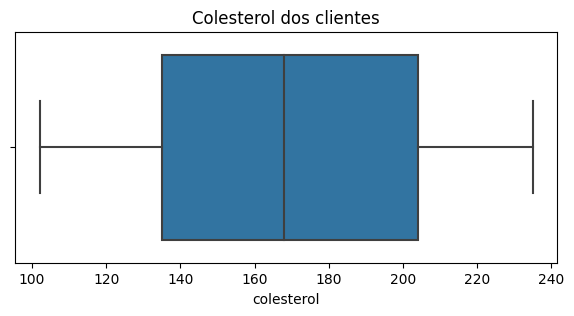

In [61]:
# Criando boxplot baseado no colesterol dos clientes

plt.figure(figsize=(7,3))
plt.title("Colesterol dos clientes")
sns.boxplot(x = 'colesterol', data = op_saude, orient= 'h')

#### Heatmap - Gráfico de correlação

<Axes: title={'center': 'Correlação entre colesterol e peso dos clientes'}>

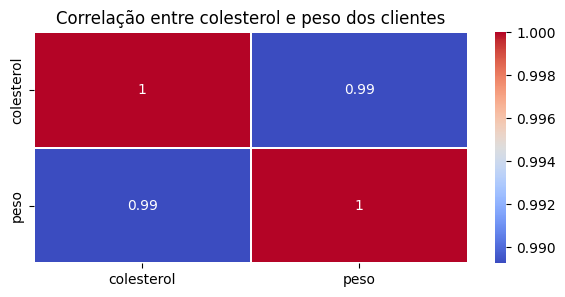

In [55]:
# Correlação entre colesterol e peso dos clientes

plt.figure(figsize=(7,3))
plt.title("Correlação entre colesterol e peso dos clientes")
corr_col_e_pes = op_saude[['colesterol', 'peso']]
sns.heatmap(corr_col_e_pes.corr(), cmap = 'coolwarm', linewidths= 0.1, linecolor='white', annot= True)

### Enriquencendo os dados

#### Criando função para gerar código classificatorios

In [56]:
# Importando biblioteca Label

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [57]:
# Criando uma variável nova dentro do data frame clientes, chamada id_genero, na transformação do LE - Label Enconder de clientes['genero']
op_saude['id_genero'] = LE.fit_transform(op_saude['genero'])


In [58]:
op_saude.head()

,Unnamed: 0,id_cliente,peso,colesterol,genero,id_estado,cod_estado,estado,sigla_estado,pais,idade,id_genero
0,0,1,102.0,111,Masculino,23,23,Roraima,RR,Brasil,17,1
1,9,2,115.0,135,Masculino,7,7,Distrito Federal,DF,Brasil,28,1
2,21,3,115.0,136,Masculino,4,4,Amazonas,AM,Brasil,62,1
3,32,4,140.0,167,Feminino,24,24,Santa Catarina,SC,Brasil,55,0
4,39,5,130.0,158,Masculino,26,26,Sergipe,SE,Brasil,44,1


#### Junções dos dados coletados

### Organizando a base de dados

#### Alterando nome das colunas

In [62]:
op_saude.rename(columns = {'id_genero': 'cod_genero', 'id_cliente' : 'cod_cliente'}, inplace=True)

#### Alterando conteúdo da variável siglas do estado

In [63]:
op_saude['sigla_estado'] = op_saude.sigla_estado.str.upper()

In [64]:
op_saude

,Unnamed: 0,cod_cliente,peso,colesterol,genero,id_estado,cod_estado,estado,sigla_estado,pais,idade,cod_genero
0,0,1,102.0,111,Masculino,23,23,Roraima,RR,Brasil,17,1
1,9,2,115.0,135,Masculino,7,7,Distrito Federal,DF,Brasil,28,1
2,21,3,115.0,136,Masculino,4,4,Amazonas,AM,Brasil,62,1
3,32,4,140.0,167,Feminino,24,24,Santa Catarina,SC,Brasil,55,0
4,39,5,130.0,158,Masculino,26,26,Sergipe,SE,Brasil,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...
220,167,221,180.0,219,Masculino,20,20,Rio Grande do Norte,RN,Brasil,33,1
221,126,222,116.0,138,Feminino,15,15,ParaÃ­ba,PB,Brasil,38,0
222,196,223,144.0,169,Feminino,18,18,PiauÃ­,PI,Brasil,24,0
223,77,224,102.0,116,Masculino,6,6,CearÃ¡,CE,Brasil,31,1


#### Alterando disposições das colunas

In [65]:
# Selecionar a ordem das colunas
ordem_colunas = ['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado']
op_saude[ordem_colunas] 

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado
0,1,Masculino,17,102.0,111,23,Roraima,RR
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF
2,3,Masculino,62,115.0,136,4,Amazonas,AM
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC
4,5,Masculino,44,130.0,158,26,Sergipe,SE
...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN
221,222,Feminino,38,116.0,138,15,ParaÃ­ba,PB
222,223,Feminino,24,144.0,169,18,PiauÃ­,PI
223,224,Masculino,31,102.0,116,6,CearÃ¡,CE


In [66]:
# Atribuindo as colunas e arrumando o index

op_saude = op_saude[ordem_colunas].reset_index(drop=True)

# Aplicação do modelo de machine learning


####Importando biblioteca

In [67]:
from sklearn.cluster import KMeans

## Aplicando o metodo cotovelo

### Calculando WCSS

In [68]:
# Criando função para calcular WCSS

def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X = dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [70]:
# Criando dados dos clientes de peso, colesterol e idade

clientes_pci = op_saude[['peso', 'colesterol', 'idade']]

In [71]:
# Calculando WCSS dos clientes

wcss_clientes = calcular_wcss(clientes_pci)

C:\Users\amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\amand\AppData\Local\Packages\PythonSoftw

In [72]:
wcss_clientes

[615755.6435484444,
 189212.54409773237,
 110985.62659521379,
 85993.49644839714,
 72765.09269954855,
 60402.61567119765,
 49363.864657354534,
 42246.69687529804,
 36793.297727438636,
 31628.834391893022]

In [73]:
# Visualizando os dados obtidos do WCSS 
for i in range(len(wcss_clientes)):
  print('O cluster', i, ' tem o valor', wcss_clientes[i])

O cluster 0  tem o valor 615755.6435484444
O cluster 1  tem o valor 189212.54409773237
O cluster 2  tem o valor 110985.62659521379
O cluster 3  tem o valor 85993.49644839714
O cluster 4  tem o valor 72765.09269954855
O cluster 5  tem o valor 60402.61567119765
O cluster 6  tem o valor 49363.864657354534
O cluster 7  tem o valor 42246.69687529804
O cluster 8  tem o valor 36793.297727438636
O cluster 9  tem o valor 31628.834391893022


In [74]:
# Visualizando os dados obtidos do WCSS

grafico_wcss = px.line(x=range(1,11), y = wcss_clientes)
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculando WCSS',
                  title_x= 0.5,
                  xaxis_title ='Número de Clusters',
                  yaxis_title ='Valor dos Clusters',
                  template='plotly_white')

### Criando agrupamento para cada cliente

In [76]:
# Aplicando algoritmo KMeans
kmeans_clientes = KMeans(n_clusters=3, random_state=0)
op_saude['clusters'] = kmeans_clientes.fit_predict(clientes_pci)

C:\Users\amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [77]:
op_saude.head()

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,clusters
0,1,Masculino,17,102.0,111,23,Roraima,RR,1
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,1
2,3,Masculino,62,115.0,136,4,Amazonas,AM,1
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,2
4,5,Masculino,44,130.0,158,26,Sergipe,SE,2


### Calculando centroides dos clusters

In [78]:
centr_cluster = kmeans_clientes.cluster_centers_

In [79]:
centr_cluster

array([[181.88235294, 216.33823529,  44.54411765],
       [109.79268293, 125.15853659,  42.63414634],
       [141.99946667, 173.21333333,  41.89333333]])

### Plotar gráfico

In [80]:
grafico = px.scatter(x=op_saude['peso'],
                     y=op_saude['colesterol'],
                     color=op_saude['clusters'])

grafico_centr = px.scatter(x=centr_cluster[:,0],
                           y=centr_cluster[:,1],
                           size= [3,3,3])

grafico_final = go.Figure(data = grafico.data + grafico_centr.data)
grafico_final.update_layout(title='Análise de Clusters',
                            title_x= 0.5,
                            xaxis_title='peso',
                            yaxis_title='colesterol',
                            template='plotly_white')
grafico_final.show()

### Criando funções para gerar gráfico

In [81]:
def grafico_scatter(x, y, cor, x_cluster, y_cluster, titulo, x_titulo, y_titulo):
  gr1 = px.scatter(x = x,
                   y= y,
                   color= cor)

  gr2 = px.scatter(x= x_cluster,
                   y= y_cluster,
                   size= [3,3,3])

  gf = go.Figure(data = gr1.data + gr2.data)
  gf.update_layout(title= titulo,
                   title_x= 0.5,
                   xaxis_title= x_titulo,
                   yaxis_title= y_titulo,
                   template='plotly_white')
  gf.show()

# Analisando dados gerados

## Segmentando clientes baseado na análise dos clusters

In [83]:
# Gerando gráfico da análise dos clusters

x= 'colesterol'
y= 'peso'

grafico_scatter(op_saude[x], op_saude[y],  op_saude['clusters'], centr_cluster[:,1], centr_cluster[:,0], 'Colesterol e Peso', x, y)

In [84]:
# Criando cópia para fazer a segmentação dos clientes
cluster_clientes = op_saude

In [85]:
# Segmentando clientes
cluster_clientes.loc[cluster_clientes['clusters']==1, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['clusters']==2, 'nome_cluster'] = 'Moderado Risco'
cluster_clientes.loc[cluster_clientes['clusters']==0, 'nome_cluster'] = 'Alto Risco'

In [86]:
# Visualizando dos dados
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,clusters,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,1,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,1,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,1,Baixo Risco
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,2,Moderado Risco
4,5,Masculino,44,130.0,158,26,Sergipe,SE,2,Moderado Risco
...,...,...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,0,Alto Risco
221,222,Feminino,38,116.0,138,15,ParaÃ­ba,PB,1,Baixo Risco
222,223,Feminino,24,144.0,169,18,PiauÃ­,PI,2,Moderado Risco
223,224,Masculino,31,102.0,116,6,CearÃ¡,CE,1,Baixo Risco


## Criando análise gráfica


<Axes: title={'center': 'Gráfico de boxplot'}, xlabel='colesterol', ylabel='estado'>

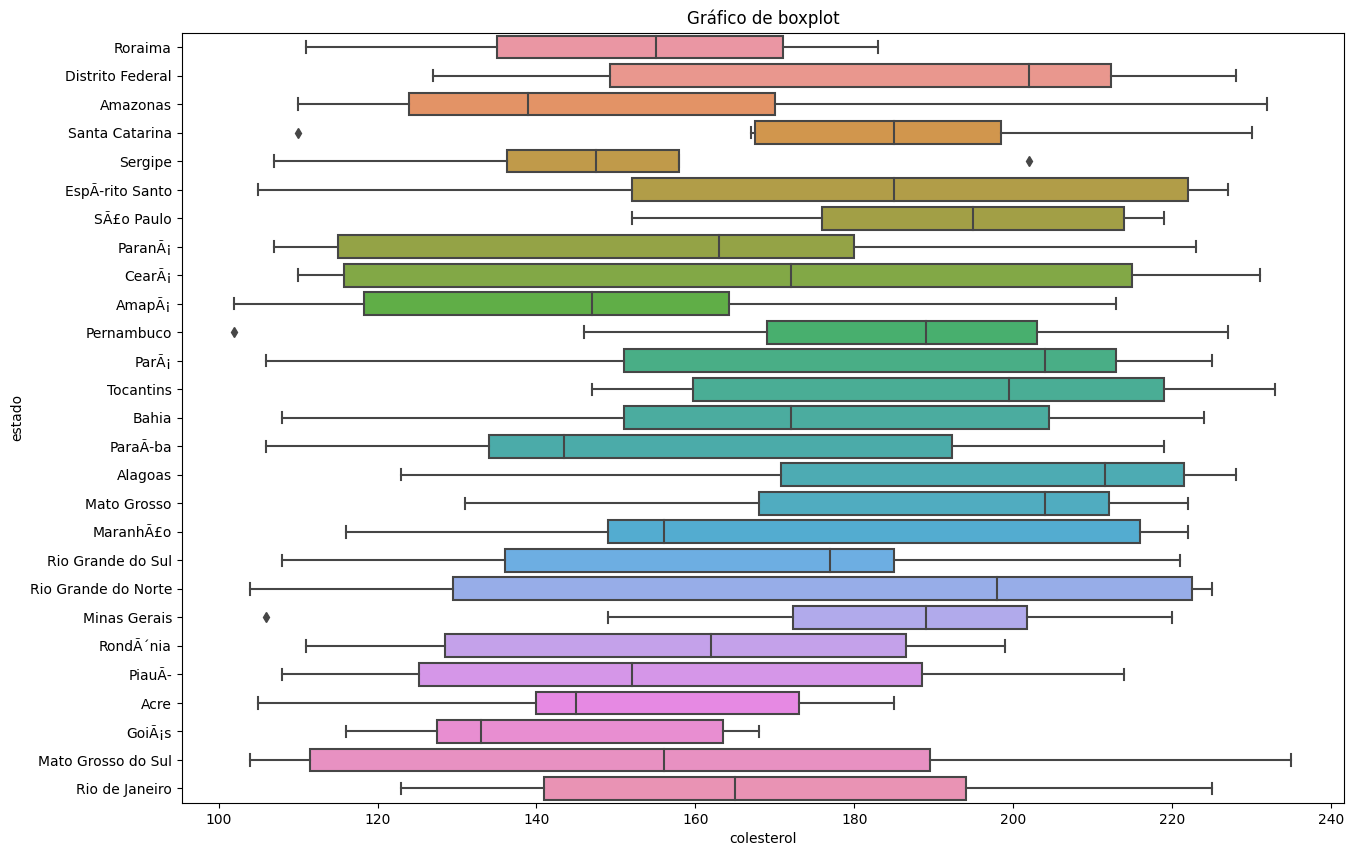

In [87]:
# Criando análise gráfica do colesterol por estado

plt.figure(figsize=(15,10))
plt.title("Gráfico de boxplot")
sns.boxplot(x='colesterol', y= 'estado', data= cluster_clientes, orient= 'h')

<Axes: title={'center': 'Gráfico de boxplot'}, xlabel='peso', ylabel='estado'>

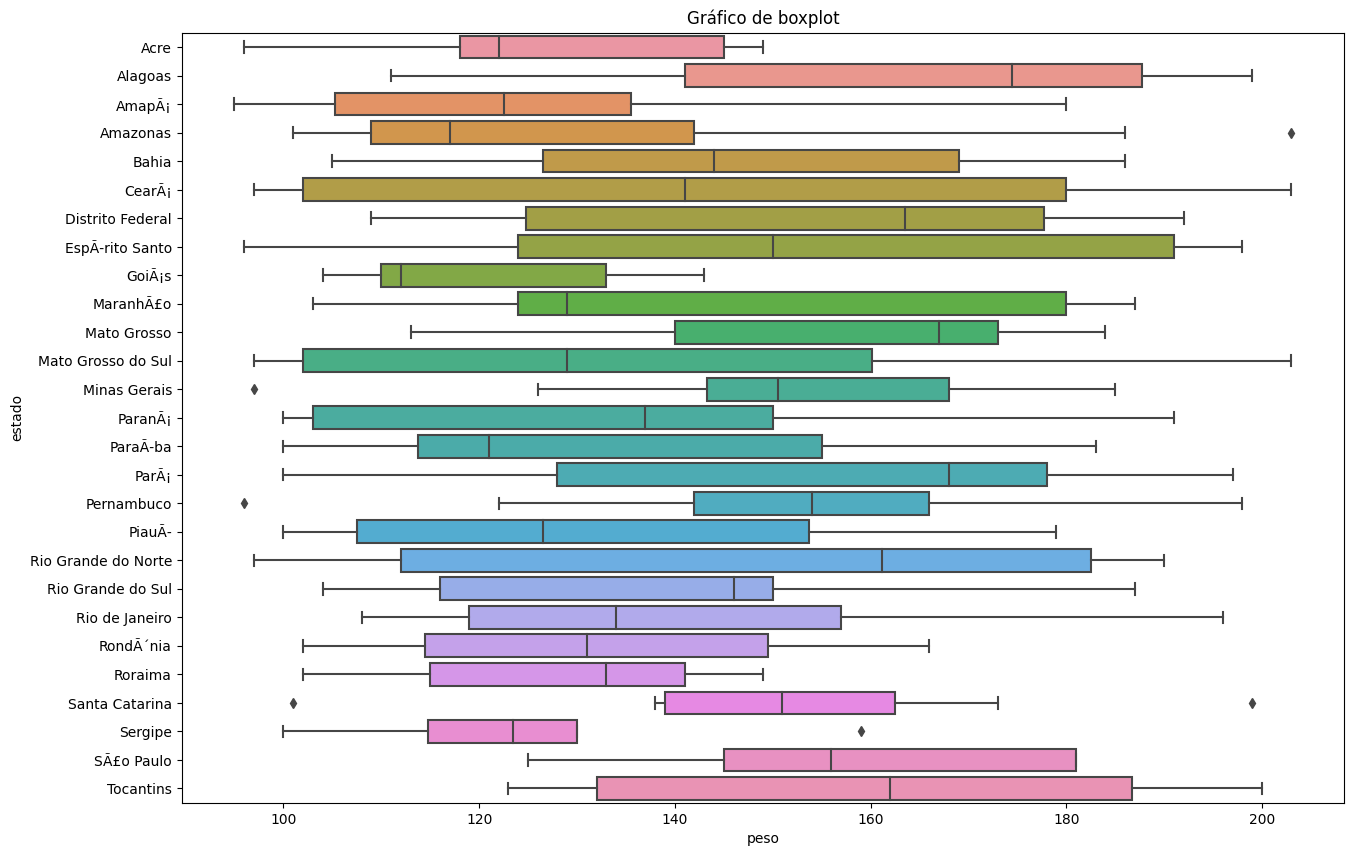

In [88]:
# Criando análise gráfica do peso por estado

plt.figure(figsize=(15,10))
plt.title("Gráfico de boxplot")
sns.boxplot(x='peso', y= 'estado', data= cluster_clientes.sort_values('estado'), orient= 'h')

<Axes: title={'center': 'Gráfico de boxplot'}, xlabel='colesterol', ylabel='nome_cluster'>

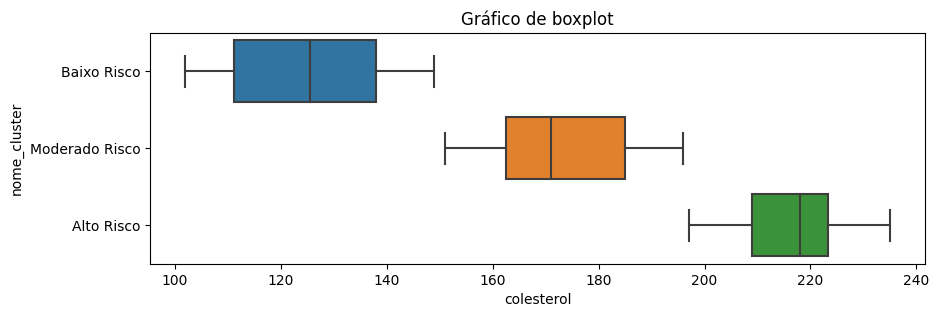

In [89]:
plt.figure(figsize=(10,3))
plt.title("Gráfico de boxplot")
sns.boxplot(x='colesterol', y= 'nome_cluster', data= cluster_clientes, orient= 'h')

## Analise dos cluster criados

In [90]:
# Agrupamento dados de cluster por medio do peso
cluster_clientes.groupby(['nome_cluster', 'genero', 'estado'], as_index = False).agg(total=('peso', 'mean'))

,nome_cluster,genero,estado,total
0,Alto Risco,Feminino,Amazonas,164.000000
1,Alto Risco,Feminino,Bahia,185.500000
2,Alto Risco,Feminino,CearÃ¡,177.000000
3,Alto Risco,Feminino,Distrito Federal,181.666667
4,Alto Risco,Feminino,EspÃ­rito Santo,193.000000
...,...,...,...,...
111,Moderado Risco,Masculino,Rio de Janeiro,141.000000
112,Moderado Risco,Masculino,RondÃ´nia,139.440000
113,Moderado Risco,Masculino,Roraima,145.333333
114,Moderado Risco,Masculino,Santa Catarina,151.500000


In [91]:
# Agrupamento dados de cluster por medio do peso
cluster_clientes.groupby(['nome_cluster', 'genero', 'estado'], as_index = True).agg(total=('peso', 'mean'))

total
nome_cluster   genero    estado                      
Alto Risco     Feminino  Amazonas          164.000000
                         Bahia             185.500000
                         CearÃ¡            177.000000
                         Distrito Federal  181.666667
                         EspÃ­rito Santo   193.000000
...                                               ...
Moderado Risco Masculino Rio de Janeiro    141.000000
                         RondÃ´nia         139.440000
                         Roraima           145.333333
                         Santa Catarina    151.500000
                         Sergipe           128.000000

[116 rows x 1 columns]

In [92]:
# Criando um dataframe com a tabela acima, mas com index=TRUE
media_peso = cluster_clientes.groupby(['nome_cluster', 'genero', 'estado'], as_index = False).agg(media=('peso', 'mean'))

C:\Users\amand\AppData\Local\Temp\ipykernel_9096\3731874021.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: title={'center': 'Distribuição das médias dos pesos por cluster'}, xlabel='nome_cluster', ylabel='media'>

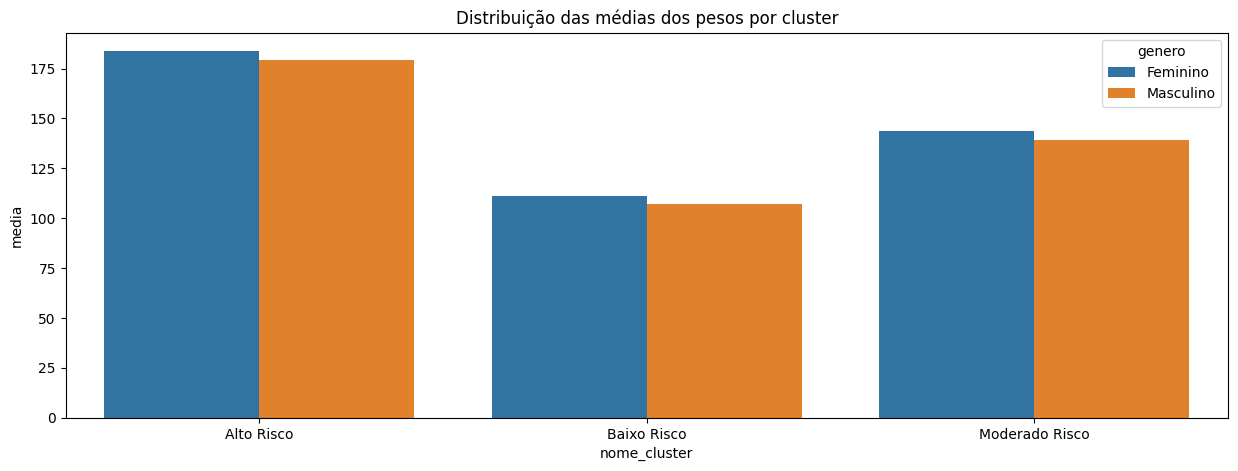

In [93]:
# Criando gráfico de barras com as médias dos pesos por cluster
plt.figure(figsize= (15,5))
plt.title('Distribuição das médias dos pesos por cluster')
sns.barplot(x='nome_cluster', y= 'media', data= media_peso, hue='genero', ci=None)

In [94]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,68.0,44.544118,15.977067,16.0,31.75,47.0,58.50,69.0
Baixo Risco,82.0,42.634146,15.442056,17.0,29.00,42.5,54.75,70.0
Moderado Risco,75.0,41.893333,14.699304,16.0,30.50,42.0,53.00,70.0


In [95]:
# Verifica os valores de idade por estado
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,68,24,Distrito Federal,6
Baixo Risco,82,26,Amazonas,8
Moderado Risco,75,26,Roraima,5


In [96]:
# Visualização dos dados dos clientes por alto risco
cluster_clientes.query('nome_cluster == "Alto Risco"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,clusters,nome_cluster
5,6,Masculino,17,198.0,227,8,EspÃ­rito Santo,ES,0,Alto Risco
8,9,Feminino,34,191.0,223,16,ParanÃ¡,PR,0,Alto Risco
9,10,Masculino,55,186.0,221,6,CearÃ¡,CE,0,Alto Risco
11,12,Masculino,62,188.0,222,6,CearÃ¡,CE,0,Alto Risco
15,16,Feminino,65,178.0,213,14,ParÃ¡,PA,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...
206,207,Feminino,54,187.0,225,20,Rio Grande do Norte,RN,0,Alto Risco
216,217,Feminino,62,203.0,235,12,Mato Grosso do Sul,MS,0,Alto Risco
219,220,Masculino,32,181.0,219,25,SÃ£o Paulo,SP,0,Alto Risco
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,0,Alto Risco


# Exportando dados

In [100]:
cluster_clientes.to_csv('main\classificação_clientes_cluster.csv', sep= ',')